<a href="https://colab.research.google.com/github/wincmoriya/pytorch-handson/blob/main/%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

In [3]:
 device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
device

'cuda'

In [5]:
# ハチとアリのデータセットをWebから取得する
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2021-11-02 15:03:00--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 54.230.15.95, 54.230.15.13, 54.230.15.29, ...
Connecting to download.pytorch.org (download.pytorch.org)|54.230.15.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  52.8MB/s    in 0.9s    

2021-11-02 15:03:01 (52.8 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [6]:
# ダウンロードされているか確認
!ls

hymenoptera_data.zip  sample_data


In [7]:
# zipに圧縮されているのでunzipする必要がある
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [9]:
# どんなフォルダ構成になっているか確認
!ls hymenoptera_data/

train  val


In [10]:
# ありとハチに分かれたデータがある
!ls hymenoptera_data/train

ants  bees


## データの前処理

In [13]:
transform = transforms.Compose([
                                # 画像サイズがバラバラなので224*224に整形する
                                transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                # 平均0.5 標準偏差0.5で正規化
                                transforms.Normalize((0.5,), (0.5,))
])

In [14]:
# 同一フォルダ内からありとはちの画像を取ってきてdatasetsを生成する
# ImageFolderという関数を使って取得する
train_dataset = datasets.ImageFolder("./hymenoptera_data/train", transform=transform)

In [16]:
# datasetができたのでdataLoaderを作成する
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [17]:
# ロードしてみる
data_iter = iter(train_loader)

In [19]:
imgs, labels = data_iter.next()

In [20]:
labels

tensor([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1])

In [22]:
imgs.size()

torch.Size([32, 3, 224, 224])

In [23]:
# 画像を1つ取得してみる
img = imgs[0]

In [25]:
# Tensorになっているのでチャネルラストにする
img_permute = img.permute(1, 2, 0)

In [26]:
# 明るさ調整
img_permute = 0.5 * img_permute + 0.5

In [27]:
img_permute = np.clip(img_permute, 0, 1)

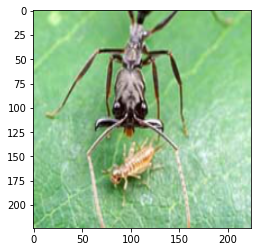

In [29]:
plt.imshow(img_permute)

In [30]:
# pretrained=Trueで学習済みモデルを読み込む
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [31]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
for param in model.parameters():
    # 勾配計算をしなくていいようにする
    param.requires_grad = False

In [33]:
# 一番最後のout_features=1000を2つの出力値に変換する
model.fc = nn.Linear(512, 2)

In [35]:
# 出力が2に変換されていることがわかる
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [36]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 学習

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [38]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    running_acc /= len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc)
    
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch: 0, loss: 0.68312206864357, acc: 0.6234375238418579
epoch: 1, loss: 0.48712095618247986, acc: 0.7796875238418579
epoch: 2, loss: 0.3770119436085224, acc: 0.8617187738418579
epoch: 3, loss: 0.31768469139933586, acc: 0.8921874761581421
epoch: 4, loss: 0.2782440818846226, acc: 0.905468761920929
epoch: 5, loss: 0.23572704195976257, acc: 0.94921875
epoch: 6, loss: 0.20779178477823734, acc: 0.938281238079071
epoch: 7, loss: 0.17717794887721539, acc: 0.9664062261581421
epoch: 8, loss: 0.17353995610028505, acc: 0.9546874761581421
epoch: 9, loss: 0.15082363784313202, acc: 0.9664062261581421
epoch: 10, loss: 0.1471660053357482, acc: 0.96875
epoch: 11, loss: 0.1609874190762639, acc: 0.948437511920929
epoch: 12, loss: 0.14293300826102495, acc: 0.9609375
epoch: 13, loss: 0.13779191579669714, acc: 0.96484375
epoch: 14, loss: 0.12917862553149462, acc: 0.96875


### 上記のイテレーションが早く回っているのはなぜか？
* 今回学習しているのは一番最後のfcだけ
* 残りの箇所は勾配計算もしていない
* そのため計算が早い

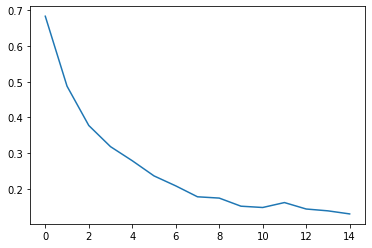

In [39]:
plt.plot(losses)

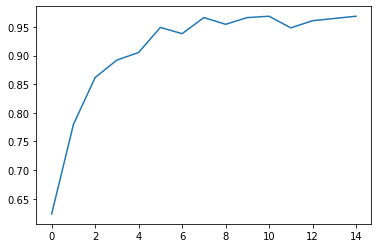

In [40]:
plt.plot(accs)